In [10]:
import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Test").getOrCreate()

This cell initializes the Spark session, which is the entry point to Spark functionality. It imports necessary libraries like findspark and SparkSession to set up the environment for working with PySpark.

In [11]:
data = spark.read.csv("MIDMARKS.csv", header=True)

This code reads a CSV file named "MIDMARKS.csv" into a Spark DataFrame. The header=True argument specifies that the first row of the CSV contains the column names.

In [12]:
data.show()

+----+-------+---+----+---+----+---+----+
|S.NO|SECTION| DV|M-II| PP|BEEE| FL|FIMS|
+----+-------+---+----+---+----+---+----+
|   1|  ALPHA| 12|   0| 17|   9| 19|  15|
|   2|  ALPHA| 19|  12| 16|  16| 18|   3|
|   3|  ALPHA| 18|  14| 18|  18| 18|  16|
|   4|  ALPHA| 15|   9| 19|  17| 19|  15|
|   5|  ALPHA| 18|  17| 19|  19| 20|  18|
|   6|  ALPHA| 17|  16| 18|  10| 15|   9|
|   7|  ALPHA| 15|  10| 20|  20| 15|  14|
|   8|  ALPHA| 17|  17| 19|  20| 19|  13|
|   9|  ALPHA| 10|  18|  A|  20| 19|  15|
|  10|  ALPHA| 18|  19| 20|  20| 20|  15|
|  11|  ALPHA| 17|  18| 20|  18| 20|  18|
|  12|  ALPHA| 20|  20| 20|  20| 19|  16|
|  13|  ALPHA| 16|  18| 11|  15| 19|  15|
|  14|  ALPHA| 17|  17| 18|  11| 15|   9|
|  15|  ALPHA| 19|  20| 20|  20| 18|  12|
|  16|  ALPHA| 13|  18| 17|  19| 16|   9|
|  17|  ALPHA| 15|  17| 18|  17| 17|  13|
|  18|  ALPHA| 11|   8| 18|  15| 19|  15|
|  19|  ALPHA| 14|  12| 16|  16| 20|  14|
|  20|  ALPHA| 19|  17| 20|  20| 20|  18|
+----+-------+---+----+---+----+--

This cell displays the first 20 rows of the DataFrame, showing a preview of the data. The output reveals the columns and some initial rows, including a non-numeric value 'A' in the PP column

In [13]:
data.printSchema()

root
 |-- S.NO: string (nullable = true)
 |-- SECTION: string (nullable = true)
 |-- DV: string (nullable = true)
 |-- M-II: string (nullable = true)
 |-- PP: string (nullable = true)
 |-- BEEE: string (nullable = true)
 |-- FL: string (nullable = true)
 |-- FIMS: string (nullable = true)



This code prints the schema of the DataFrame, which shows the column names and their inferred data types. The output indicates that all columns are read as string type, which is a common issue when reading CSVs without a specified schema.

In [5]:
data.groupBy("SECTION").count().show()

+-------+-----+
|SECTION|count|
+-------+-----+
|   GAMA|    1|
|   ZETA|   19|
|   SGMA|    1|
|   NULL|   41|
|   BETA|   60|
|  OMEGA|   60|
|EPSILON|   60|
|  SIGMA|   59|
|  ALPHA|   60|
|  GAMMA|   59|
|  DELTA|   60|
+-------+-----+



This cell groups the data by the SECTION column and counts the occurrences of each unique value. The output shows various section names, including some with spelling errors (GAMA, SGMA) and a NULL value.

In [15]:
data = data.na.fill({"SECTION": "ZETA"})

This code fills NULL values in the SECTION column with the value "ZETA". This is a data cleaning step to handle missing section information.

In [16]:
data.groupBy("SECTION").count().show()

+-------+-----+
|SECTION|count|
+-------+-----+
|   GAMA|    1|
|   ZETA|   60|
|   SGMA|    1|
|   BETA|   60|
|  OMEGA|   60|
|EPSILON|   60|
|  SIGMA|   59|
|  ALPHA|   60|
|  GAMMA|   59|
|  DELTA|   60|
+-------+-----+




This cell groups the data by SECTION again and counts the occurrences, confirming the change from the previous step. The NULL values are no longer present, and the count for ZETA has increased.



In [17]:
from pyspark.sql.functions import when, col

data = data.withColumn(
    "SECTION",
    when(col("SECTION") == "GAMA", "GAMMA")
    .when(col("SECTION") == "SGMA", "SIGMA")
    .otherwise(col("SECTION"))
)



This code uses a when statement to standardize the SECTION column. It corrects the spelling of "GAMA" to "GAMMA" and "SGMA" to "SIGMA"

In [18]:
data.groupBy("SECTION").count().show()

+-------+-----+
|SECTION|count|
+-------+-----+
|   ZETA|   60|
|   BETA|   60|
|  OMEGA|   60|
|EPSILON|   60|
|  SIGMA|   60|
|  ALPHA|   60|
|  GAMMA|   60|
|  DELTA|   60|
+-------+-----+



This cell groups the data by SECTION and counts the values again to verify the spelling corrections. The output confirms that "GAMA" and "SGMA" are gone and their counts have been absorbed into "GAMMA" and "SIGMA".


In [19]:
data.groupBy("DV").count().show()

+----+-----+
|  DV|count|
+----+-----+
|   7|    6|
|  15|   45|
|  11|   31|
|   3|    1|
|   8|   10|
|  16|   48|
|NULL|    1|
|   5|    8|
|  18|   47|
|  2o|    1|
|  17|   52|
|   6|    9|
|  19|   37|
|   A|    8|
|   9|   14|
|   1|    3|
|  20|   52|
|  10|   22|
|   4|    3|
|  12|   27|
+----+-----+
only showing top 20 rows


This cell groups the data by the DV column and counts the occurrences of each unique value. The output shows that this column, which should be numeric, contains non-numeric values like NULL, 2o, and A.

In [20]:
data = data.na.fill({"DV": "0"})

This code replaces NULL values in the DV column with the string "0". This is a simple data cleaning step to handle missing values.

In [21]:
data.groupBy("DV").count().show()

+---+-----+
| DV|count|
+---+-----+
|  7|    6|
| 15|   45|
| 11|   31|
|  3|    1|
|  8|   10|
| 16|   48|
|  0|    1|
|  5|    8|
| 18|   47|
| 2o|    1|
| 17|   52|
|  6|    9|
| 19|   37|
|  A|    8|
|  9|   14|
|  1|    3|
| 20|   52|
| 10|   22|
|  4|    3|
| 12|   27|
+---+-----+
only showing top 20 rows


This cell groups by DV and counts the values again, showing that the NULL value is now a 0. The non-numeric values 2o and A are still present.

In [22]:
from pyspark.sql.functions import col, when, expr

# Safely cast DV column to integer
# - "A" becomes 0
# - numeric strings become integers
# - everything else becomes NULL
data = data.withColumn(
    "DV",
    when(col("DV") == "A", 0)  # replace "A" with 0
    .otherwise(expr("try_cast(DV as int)"))  # safe numeric conversion
)

# Group and count without errors
data.groupBy("DV").count().show()

+----+-----+
|  DV|count|
+----+-----+
|  12|   27|
|NULL|    3|
|   1|    3|
|  13|   25|
|  16|   48|
|   6|    9|
|   3|    1|
|  20|   52|
|   5|    8|
|  19|   37|
|  15|   45|
|  17|   52|
|   9|   14|
|   4|    3|
|   8|   10|
|   7|    6|
|  10|   22|
|  11|   31|
|  14|   24|
|   2|    4|
+----+-----+
only showing top 20 rows


This code performs a more robust data cleaning on the DV column, using try_cast to convert string values to integers and handling exceptions. It specifically replaces "A" with 0 and other invalid numeric strings with NULL.


In [23]:
data.groupBy("M-II").count().show() 

+----+-----+
|M-II|count|
+----+-----+
|   7|   14|
|  15|   24|
|  11|   24|
|   3|   34|
|   8|   29|
|  16|   16|
|   0|   24|
|NULL|    3|
|   5|   23|
|  18|   23|
|  I2|    1|
|  17|   32|
|   6|   18|
|   o|    3|
|  19|   12|
|   A|    4|
|  II|    1|
|  AB|    5|
|   9|   17|
|   1|   16|
+----+-----+
only showing top 20 rows


This cell groups by the M-II column and counts the values. The output shows several non-numeric values like NULL, I2, o, A, and II.

In [24]:
data = (data
    .withColumn(
        "M-II",
        when(col("M-II").isNull(), "0")  
        .when(col("M-II") == "II", "11") 
        .when(col("M-II")=="A","0") 
        .when(col("M-II")=="AB","0")
        .when(col("M-II")=="I","1")
        .when(col("M-II")=="I2","12")
        .when(col("M-II")=="o","0") 
        .otherwise(col("M-II"))  
    )
)

data.groupBy("M-II").count().show()



+----+-----+
|M-II|count|
+----+-----+
|   7|   14|
|  15|   24|
|  11|   25|
|   3|   34|
|   8|   29|
|  16|   16|
|   0|   39|
|   5|   23|
|  18|   23|
|  17|   32|
|   6|   18|
|  19|   12|
|   9|   17|
|   1|   18|
|  20|   44|
|  10|   19|
|   4|   22|
|  12|   24|
|  13|   18|
|  14|   17|
+----+-----+
only showing top 20 rows


This code cleans the M-II column by replacing several non-numeric strings with numeric ones. It converts "II" to "11", "I" to "1", and "I2" to "12", while replacing "A", "AB", and "o" with "0".

In [25]:
data.groupBy("PP").count().show()


+---+-----+
| PP|count|
+---+-----+
|  7|   10|
| 15|   26|
| 11|   28|
|  3|   13|
|  8|   12|
| 16|   28|
|  0|    3|
|  5|   15|
| 18|   35|
| 17|   31|
|  6|   18|
| 19|   35|
|  A|    8|
| AB|    3|
|  9|   24|
|  1|    7|
| 20|   70|
| 10|   19|
|  4|   10|
| 12|   28|
+---+-----+
only showing top 20 rows


This cell groups the data by PP and counts the values, revealing non-numeric entries like A and AB. It also shows a NULL value.

In [26]:
data = data.withColumn(
    "PP",
    when(col("PP").isNull(), "0")
    .when(col("PP") == "A", "0")
    .when(col("PP") == "AB", "0")
    .otherwise(col("PP"))
)

data.groupBy("PP").count().show()

+---+-----+
| PP|count|
+---+-----+
|  7|   10|
| 15|   26|
| 11|   28|
|  3|   13|
|  8|   12|
| 16|   28|
|  0|   14|
|  5|   15|
| 18|   35|
| 17|   31|
|  6|   18|
| 19|   35|
|  9|   24|
|  1|    7|
| 20|   70|
| 10|   19|
|  4|   10|
| 12|   28|
| 13|   15|
| 14|   28|
+---+-----+
only showing top 20 rows


This code cleans the PP column, filling NULL values with "0" and replacing A and AB with "0". This standardizes the column to prepare it for numeric operations

In [27]:
data.groupBy("BEEE").count().show()

+----+-----+
|BEEE|count|
+----+-----+
|   7|   15|
|  15|   28|
|  11|   31|
|   3|   14|
|   8|   13|
|  16|   23|
|   0|    1|
|NULL|    2|
|   5|   10|
|  18|   30|
|  17|   45|
|  Ab|    1|
|   6|   14|
|   o|    1|
|  19|   41|
|   A|   15|
|   9|   19|
|   1|    3|
|  20|   76|
|  10|   20|
+----+-----+
only showing top 20 rows


This cell groups the data by BEEE and counts the values, identifying non-numeric entries like NULL, Ab, o, and A. This indicates a need for data cleaning before numeric analysis.

In [28]:
data = data.withColumn(
    "BEEE",
    when(col("BEEE").isNull(), "0")
    .when(col("BEEE") == "Ab", "0")
    .when(col("BEEE") == "A", "0")
    .when(col("BEEE") == "o", "0")
    .otherwise(col("BEEE"))
)

data.groupBy("BEEE").count().show()

+----+-----+
|BEEE|count|
+----+-----+
|   7|   15|
|  15|   28|
|  11|   31|
|   3|   14|
|   8|   13|
|  16|   23|
|   0|   20|
|   5|   10|
|  18|   30|
|  17|   45|
|   6|   14|
|  19|   41|
|   9|   19|
|   1|    3|
|  20|   76|
|  10|   20|
|   4|   12|
|  12|   21|
|  13|   14|
|  14|   21|
+----+-----+
only showing top 20 rows


This code cleans the BEEE column by replacing the non-numeric values NULL, Ab, A, and o with "0". This step is crucial for ensuring the data type is consistent for calculations

In [29]:
data.groupBy("FL").count().show()

+----+-----+
|  FL|count|
+----+-----+
|   7|    2|
|  15|   85|
|  11|   10|
|   8|    6|
|  16|   15|
|NULL|    1|
|  18|   58|
|  2o|    1|
|  17|    9|
|   6|    2|
|  19|   34|
|   A|   10|
|  AB|    1|
|   9|    3|
|  20|  120|
|  10|   55|
|  12|    7|
|  13|   50|
|  14|   11|
+----+-----+



This cell groups by the FL column and counts the values, revealing several non-numeric entries such as NULL, 2o, A, and AB. The presence of "2o" suggests a typo for the number 20.

In [30]:
data = data.withColumn(
    "FL",
    when(col("Fl").isNull(), "0")
    .when(col("FL") == "A", "0")
    .when(col("Fl") == "AB", "0")
    .when(col("FL") == "2o", "20")
    .otherwise(col("FL"))
)

data.groupBy("Fl").count().show()

+---+-----+
| Fl|count|
+---+-----+
|  7|    2|
| 15|   85|
| 11|   10|
|  8|    6|
| 16|   15|
|  0|   12|
| 18|   58|
| 17|    9|
|  6|    2|
| 19|   34|
|  9|    3|
| 20|  121|
| 10|   55|
| 12|    7|
| 13|   50|
| 14|   11|
+---+-----+



This code cleans the FL column by replacing NULL, A, and AB with "0", and specifically corrects the typo "2o" to "20". The column name Fl is used in the withColumn method, which is an inconsistency that should be noted.

In [31]:
data.groupBy("FIMS").count().show()


+----+-----+
|FIMS|count|
+----+-----+
|   7|    5|
|  15|   57|
|  11|   22|
|   3|    6|
|   8|   11|
|  16|   49|
|   0|    1|
|   5|    5|
|  18|   62|
|  17|   40|
|   6|    5|
|  19|   34|
|   A|    7|
|  Io|    1|
|  AB|    9|
|   9|   28|
|   1|    3|
|  20|   12|
|  10|   18|
|   4|    5|
+----+-----+
only showing top 20 rows


This cell groups by the FIMS column and counts the values, revealing non-numeric entries like NULL, A, Io, and AB. These values need to be cleaned before the data can be used for calculations.

In [32]:
data = data.withColumn(
    "FIMS",
    when(col("FIMS").isNull(), "0")
    .when(col("FIMS") == "Io", "10")
    .when(col("FIMS") == "AB", "0")
    .when(col("FIMS") == "A", "0")
    
    .otherwise(col("FIMS"))
)

data.groupBy("FIMS").count().show()

+----+-----+
|FIMS|count|
+----+-----+
|   7|    5|
|  15|   57|
|  11|   22|
|   3|    6|
|   8|   11|
|  16|   49|
|   0|   17|
|   5|    5|
|  18|   62|
|  17|   40|
|   6|    5|
|  19|   34|
|   9|   28|
|   1|    3|
|  20|   12|
|  10|   19|
|   4|    5|
|  12|   20|
|  13|   36|
|  14|   40|
+----+-----+
only showing top 20 rows


This code cleans the FIMS column by replacing NULL, AB, and A with "0". It also corrects the non-standard numeric string Io to "10".

In [33]:
import pandas as pd
import numpy as np

# Load the data and rename the column
data= pd.read_csv("MIDMARKS.csv")
data.rename(columns={'M-II': 'M2'}, inplace=True)

# Handle missing data and replace specific values
data['SECTION'] = data['SECTION'].fillna('SIGMA')
data['SECTION'] = data['SECTION'].replace('', 'SIGMA')
data['FL'] = data['FL'].fillna(0)
data = data.dropna()

# Replace string values first
data = data.replace("AB", -1)
data = data.replace("A", -1)
data = data.replace("MP", -2)

# Use pd.to_numeric to handle any other non-numeric values
# This converts invalid parsing to NaN
data['DV'] = pd.to_numeric(data['DV'], errors='coerce').astype('Int64')
data['M2'] = pd.to_numeric(data['M2'], errors='coerce').astype('Int64')
data['PP'] = pd.to_numeric(data['PP'], errors='coerce').astype('Int64')
data['BEEE'] = pd.to_numeric(data['BEEE'], errors='coerce').astype('Int64')
data['FL'] = pd.to_numeric(data['FL'], errors='coerce').astype('Int64')
data['FIMS'] = pd.to_numeric(data['FIMS'], errors='coerce').astype('Int64')

# Fill any NaN values created by the above step with 0
data.fillna(0, inplace=True)

# Create the S.NO column and reset the index
data['S.NO'] = range(1, len(data) + 1)
data = data.reset_index(drop=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   S.NO     474 non-null    int64 
 1   SECTION  474 non-null    object
 2   DV       474 non-null    Int64 
 3   M2       474 non-null    Int64 
 4   PP       474 non-null    Int64 
 5   BEEE     474 non-null    Int64 
 6   FL       474 non-null    Int64 
 7   FIMS     474 non-null    Int64 
dtypes: Int64(6), int64(1), object(1)
memory usage: 32.5+ KB


This cell shifts from PySpark to Pandas for data cleaning and transformation. It loads the CSV, renames a column, handles missing values, replaces non-numeric strings with numeric values, and converts columns to a numeric data type.

In [34]:
data['Total']=data['DV']+data['M2']+data['PP']+data['BEEE']+data['FL']+data['FIMS']
data['Percentage']=round((data['Total']/120)*100,2)

This code calculates the Total marks by summing up the values of the cleaned numeric columns (DV, M2, PP, BEEE, FL, FIMS). It also calculates the Percentage based on a total score of 120 and rounds it to two decimal places.

In [35]:
data.loc[(data["Percentage"]>90) & (data["Percentage"]<=100),["Grade"]]="A+"
data.loc[(data["Percentage"]>80) & (data ["Percentage"]<=90), ["Grade"]]="A"
data.loc[(data["Percentage"]>70) & (data["Percentage"]<=80), ["Grade"]]="B+"
data.loc[(data["Percentage"]>60) & (data["Percentage"]<=70), ["Grade"]]="B"
data.loc[(data["Percentage"]>=50) & (data["Percentage"]<=60), ["Grade"]]="C"
data.loc[(data["Percentage"]>0) & (data["Percentage"]<50),["Grade"]]="F"
data.loc[(data["Percentage"]==0), ["Grade"]]="AB"

This cell assigns a letter grade (A+, A, B+, B, C, F, AB) to each row based on the calculated Percentage. It uses data.loc to conditionally assign grades based on a series of percentage ranges.

In [36]:
a=data.loc[(data['DV']>=10) & (data['DV']<=20)]
a=a.reset_index()
a

,index,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade
0,0,1,ALPHA,12,0,17,9,19,15,72,60.0,C
1,1,2,ALPHA,19,12,16,16,18,3,84,70.0,B
2,2,3,ALPHA,18,14,18,18,18,16,102,85.0,A
3,3,4,ALPHA,15,9,19,17,19,15,94,78.33,B+
4,4,5,ALPHA,18,17,19,19,20,18,111,92.5,A+
...,...,...,...,...,...,...,...,...,...,...,...,...
401,469,470,SIGMA,11,4,2,2,8,10,37,30.83,F
402,470,471,SIGMA,18,2,12,3,17,15,67,55.83,C
403,471,472,SIGMA,20,6,16,11,20,14,87,72.5,B+
404,472,473,SIGMA,20,20,5,19,18,14,96,80.0,B+


This cell displays the final DataFrame after all the data cleaning and transformation steps. The output shows the new Total, Percentage, and Grade columns appended to the cleaned data.

In [37]:
# Import Spark
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("MatplotlibExample").getOrCreate()



In [38]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [39]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Marks in DV')

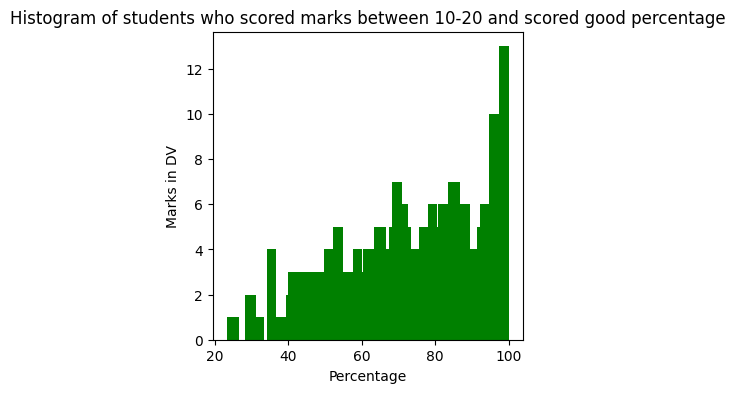

In [40]:
a1=a.groupby('DV')['Percentage']
a1.hist(color='green', figsize=[4,4], grid=False, bins=20)
plt.title("Histogram of students who scored marks between 10-20 and scored good percentage")
plt.xlabel('Percentage')
plt.ylabel('Marks in DV')



This code generates a histogram to visualize the distribution of Percentage scores for students, grouped by the DV column. The plot's title suggests it aims to specifically analyze the scores of students who received marks between 10 and 20 in the DV subject.

In [41]:
a=data.loc[(data['PP'] >= 10) & (data['PP'] <= 20)]
a=a.reset_index()
a

,index,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade
0,0,1,ALPHA,12,0,17,9,19,15,72,60.0,C
1,1,2,ALPHA,19,12,16,16,18,3,84,70.0,B
2,2,3,ALPHA,18,14,18,18,18,16,102,85.0,A
3,3,4,ALPHA,15,9,19,17,19,15,94,78.33,B+
4,4,5,ALPHA,18,17,19,19,20,18,111,92.5,A+
...,...,...,...,...,...,...,...,...,...,...,...,...
333,467,468,SIGMA,20,18,20,20,20,19,117,97.5,A+
334,468,469,SIGMA,20,20,20,20,20,20,120,100.0,A+
335,470,471,SIGMA,18,2,12,3,17,15,67,55.83,C
336,471,472,SIGMA,20,6,16,11,20,14,87,72.5,B+


This code first creates a new DataFrame `a` by selecting rows where the value in the `PP` column is between 10 and 20, inclusive. It then resets the index of this new DataFrame and displays its contents.

In [42]:
a=data.loc[(data['M2'] >= 10) & (data['M2'] <= 20)]
a=a.reset_index()
a

,index,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade
0,1,2,ALPHA,19,12,16,16,18,3,84,70.0,B
1,2,3,ALPHA,18,14,18,18,18,16,102,85.0,A
2,4,5,ALPHA,18,17,19,19,20,18,111,92.5,A+
3,5,6,ALPHA,17,16,18,10,15,9,85,70.83,B+
4,6,7,ALPHA,15,10,20,20,15,14,94,78.33,B+
...,...,...,...,...,...,...,...,...,...,...,...,...
244,466,467,SIGMA,20,20,20,20,20,20,120,100.0,A+
245,467,468,SIGMA,20,18,20,20,20,19,117,97.5,A+
246,468,469,SIGMA,20,20,20,20,20,20,120,100.0,A+
247,472,473,SIGMA,20,20,5,19,18,14,96,80.0,B+


Text(0, 0.5, 'Marks in M2')

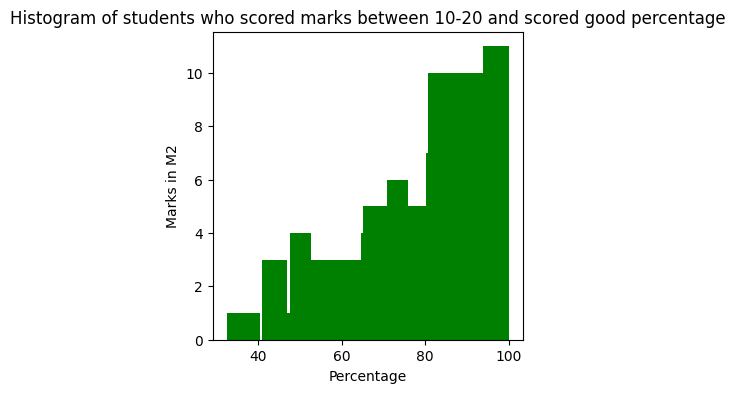

In [43]:
a1=a.groupby('M2')['Percentage']
a1.hist(color='green', figsize=[4,4], grid=False, bins=8)
plt.title("Histogram of students who scored marks between 10-20 and scored good percentage")
plt.xlabel('Percentage')
plt.ylabel('Marks in M2')


This code first groups the data by the `M2` column and then selects the `Percentage` column for a histogram plot. The histogram visualizes the distribution of `Percentage` scores for students who scored between 10 and 20 in the `M2` subject. The title suggests the plot is designed to show how many students in that group achieved a good percentage.

Text(0, 0.5, 'Marks in PP')

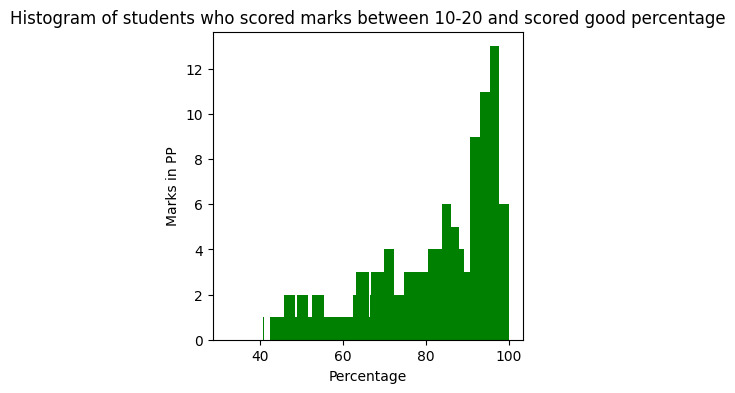

In [44]:
a1=a.groupby('PP')['Percentage']
a1.hist(color='green', figsize=[4,4], grid=False, bins=13)
plt.title("Histogram of students who scored marks between 10-20 and scored good percentage")
plt.xlabel('Percentage')
plt.ylabel('Marks in PP')

This code first groups the data by the `PP` column and then selects the `Percentage` column. It then generates a histogram to visualize the distribution of `Percentage` scores for students who scored between 10 and 20 in the `PP` subject. The title of the plot indicates the intention to show the percentage of students in this group who scored well.

In [45]:
fail_table=data[(data.PP<8) & (data.DV<8) & (data.M2<8) & (data.BEEE<8) & (data.FL<8) & (data.FIMS<8)]
fail_table

,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade
82,83,BETA,2,0,2,-1,-1,-1,1,0.83,F
209,210,EPSILON,-1,-1,-1,-1,-1,-1,-6,-5.0,NaN
300,301,OMEGA,-1,-1,-1,-1,-1,-1,-6,-5.0,NaN
365,366,ZETA,-1,-1,-1,-1,-1,-1,-6,-5.0,NaN
377,378,OMEGA,-1,-1,-1,-1,-1,-1,-6,-5.0,NaN
396,397,OMEGA,-1,-1,-1,-1,-1,-1,-6,-5.0,NaN
420,421,SIGMA,6,1,-1,-1,-1,-1,3,2.5,F
422,423,SIGMA,-1,-1,-1,-1,-1,-1,-6,-5.0,NaN
448,449,SIGMA,1,5,0,-1,-1,-1,3,2.5,F
456,457,SIGMA,-1,-1,-1,-1,-1,-1,-6,-5.0,NaN


In [46]:
b=data.loc[(data['Percentage'] >= 60) & (data['Percentage'] <= 80)]
b=b.reset_index()
b

,index,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade
0,0,1,ALPHA,12,0,17,9,19,15,72,60.0,C
1,1,2,ALPHA,19,12,16,16,18,3,84,70.0,B
2,3,4,ALPHA,15,9,19,17,19,15,94,78.33,B+
3,5,6,ALPHA,17,16,18,10,15,9,85,70.83,B+
4,6,7,ALPHA,15,10,20,20,15,14,94,78.33,B+
...,...,...,...,...,...,...,...,...,...,...,...,...
177,460,461,SIGMA,12,4,19,17,14,15,81,67.5,B
178,461,462,SIGMA,17,3,14,11,19,17,81,67.5,B
179,465,466,SIGMA,15,14,11,16,13,15,84,70.0,B
180,471,472,SIGMA,20,6,16,11,20,14,87,72.5,B+


In [47]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

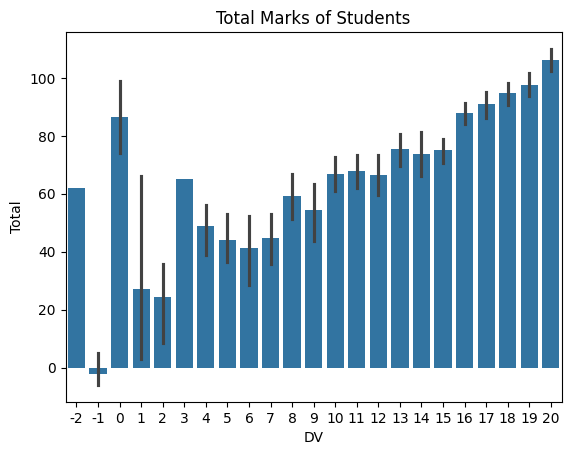

In [49]:
sns.barplot(x='DV', y='Total', data=data)
plt.xticks(rotation=0)
plt.title('Total Marks of Students')
plt.show()

This code generates a **bar plot** using the seaborn library, which visualizes the relationship between the `DV` (Marks in DV) and `Total` marks. The title of the plot, 'Total Marks of Students,' indicates its purpose is to show the total marks achieved by students based on their marks in the `DV` subject. The x-axis labels are not rotated, which is appropriate since they are likely single-digit or single-character values.

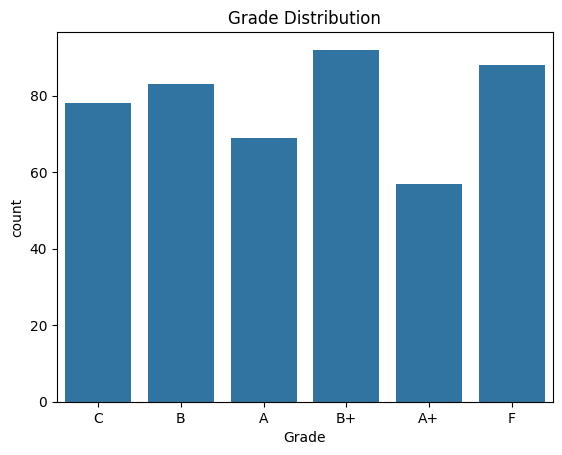

In [50]:
sns.countplot(x='Grade', data=data)
plt.title('Grade Distribution')
plt.show()

This code generates a count plot showing the distribution of grades among students. It visualizes how many students fall into each grade category, providing a clear overview of the grading results.



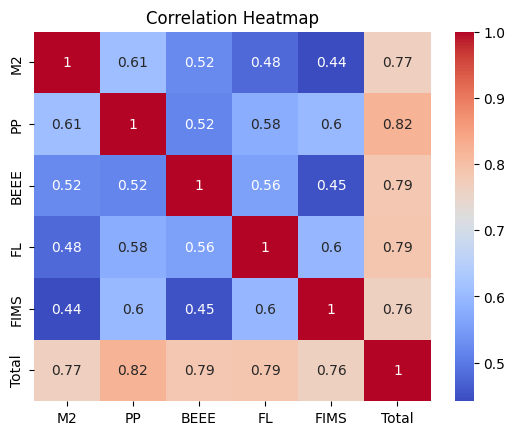

In [51]:
sns.heatmap(data.iloc[:, 3:9].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

this code creates a correlation heatmap to show the relationships between different subject marks (from columns 3 to 9 in the DataFrame). The heatmap uses color and annotation to display the correlation coefficients, helping to identify which subjects' scores are strongly related.

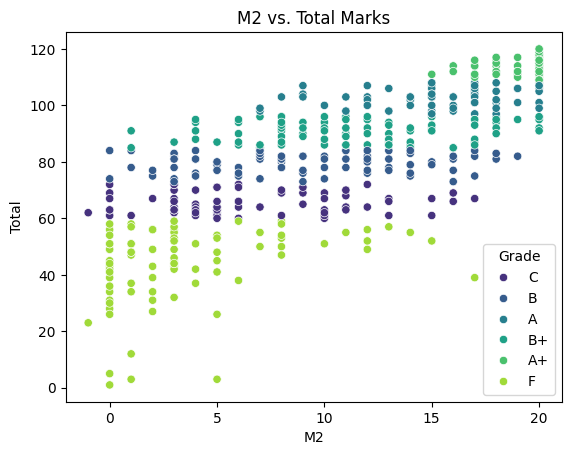

In [52]:
sns.scatterplot(x='M2', y='Total', data=data, hue='Grade', palette='viridis')
plt.title('M2 vs. Total Marks')
plt.show()

This code creates a scatter plot to visualize the relationship between marks in M2 and Total marks. The plot is enhanced with color (hue) to differentiate the data points by their assigned Grade, providing insight into how a student's M2 score relates to their overall performance.

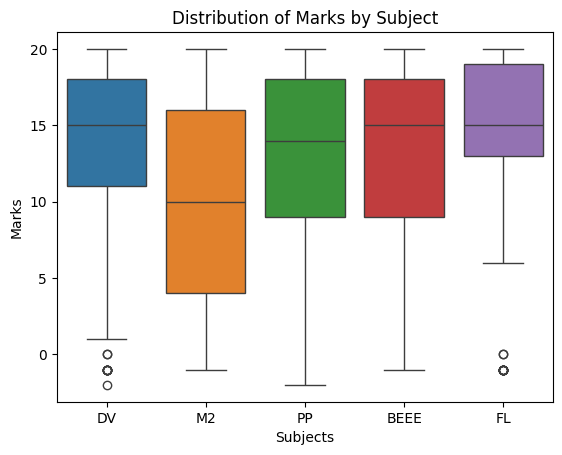

In [53]:
sns.boxplot(data=data.iloc[:, 1:7])
plt.title('Distribution of Marks by Subject')
plt.xlabel('Subjects')
plt.ylabel('Marks')
plt.show()


This code generates a box plot to show the statistical distribution of marks for each subject from columns 1 to 7. The box plot provides a visual summary of the median, quartiles, and outliers for each subject's scores

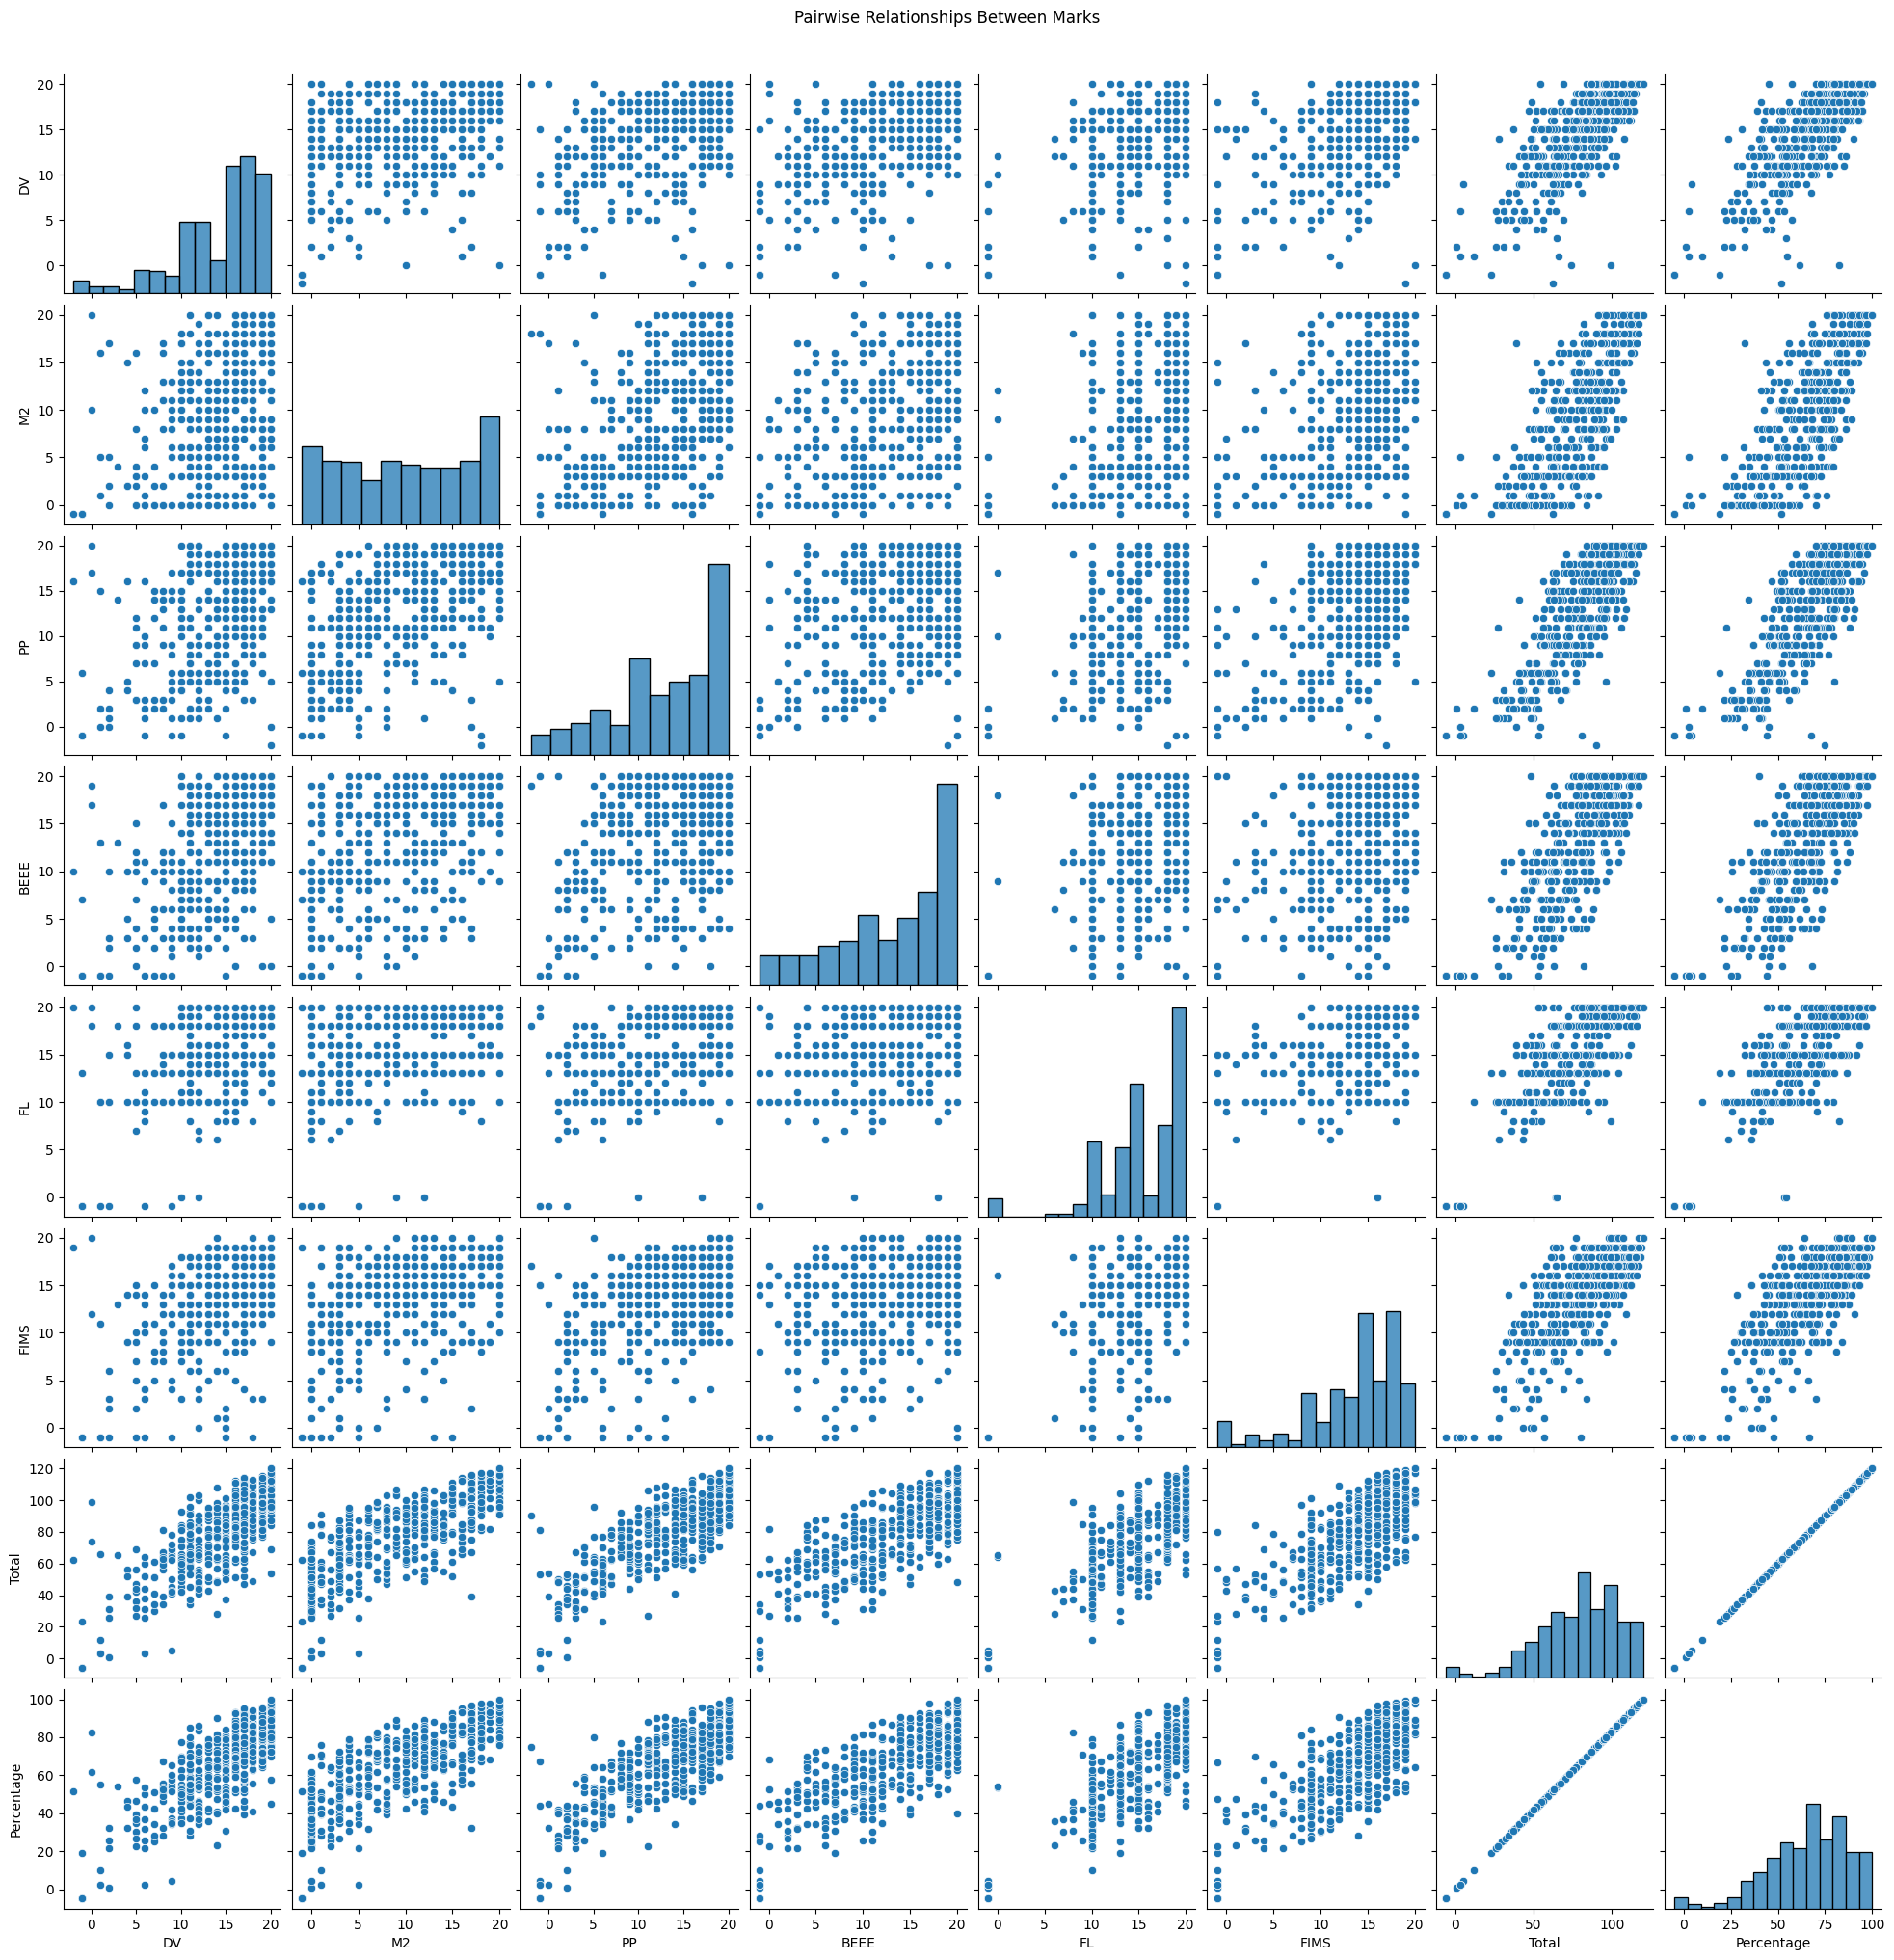

In [54]:
sns.pairplot(data.iloc[:, 1:])
plt.suptitle('Pairwise Relationships Between Marks', y=1.02)
plt.show()

This code creates a pair plot, which is a grid of scatter plots that shows the pairwise relationships between all the numeric columns from the second column onwards in the DataFrame. The plot helps to quickly identify patterns and correlations between different subjects and overall marks.

C:\Users\vinay\AppData\Local\Temp\ipykernel_24632\4076696972.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Grade', y='Total', data=data, palette='muted')


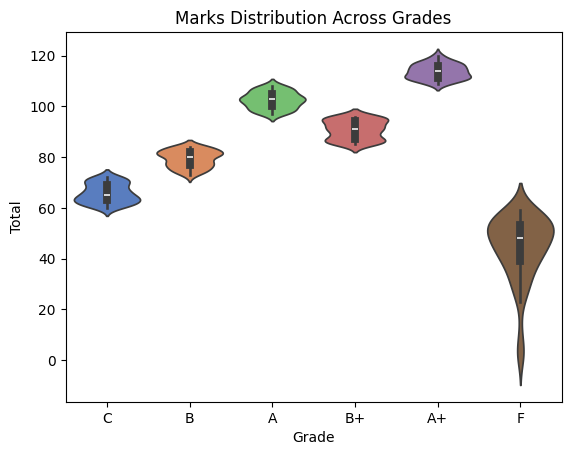

In [55]:
sns.violinplot(x='Grade', y='Total', data=data, palette='muted')
plt.title('Marks Distribution Across Grades')
plt.show()

This code generates a violin plot to show the distribution of total marks (Total) for each grade (Grade). The plot reveals the density of marks at different values within each grade, giving a richer view than a simple box plot.

C:\Users\vinay\AppData\Local\Temp\ipykernel_24632\2870808307.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Total'], shade=True, color='blue')


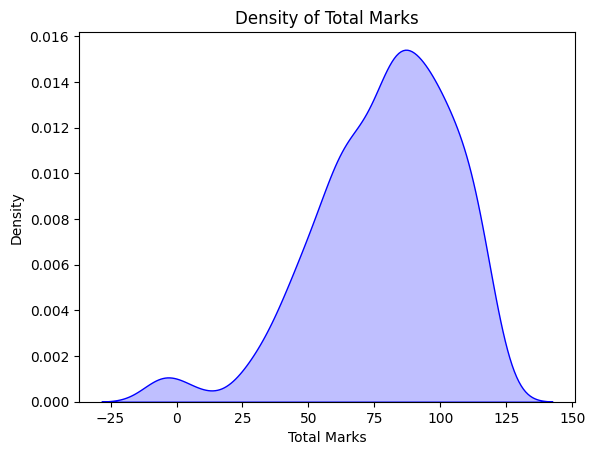

In [56]:
sns.kdeplot(data['Total'], shade=True, color='blue')
plt.title('Density of Total Marks')
plt.xlabel('Total Marks')
plt.ylabel('Density')
plt.show()


This code creates a Kernel Density Estimate (KDE) plot to visualize the distribution of the Total marks. The plot shows the probability density of the total marks, providing a smooth curve that highlights where the marks are most concentrated.

C:\Users\vinay\AppData\Local\Temp\ipykernel_24632\1980687520.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subject_means.index, y=subject_means.values, palette='pastel')


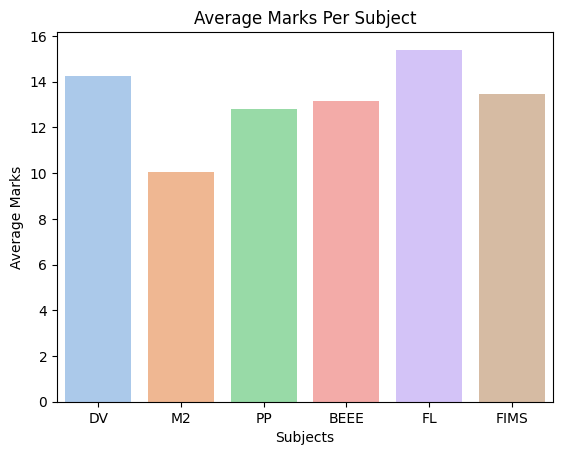

In [57]:
# Select the specific numeric columns for which you want to calculate the mean
subject_columns = ['DV', 'M2', 'PP', 'BEEE', 'FL', 'FIMS']

# Calculate the mean for only these columns
subject_means = data[subject_columns].mean()

# Now, the rest of your code should run without error
sns.barplot(x=subject_means.index, y=subject_means.values, palette='pastel')
plt.title('Average Marks Per Subject')
plt.xlabel('Subjects')
plt.ylabel('Average Marks')
plt.show()


This code calculates the average marks for a specific list of subjects and then creates a bar plot to display these averages. The plot provides a quick visual comparison of the performance across different subjects.


C:\Users\vinay\AppData\Local\Temp\ipykernel_24632\2870337364.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Grade', y='Total', data=data, jitter=True, palette='Set2')


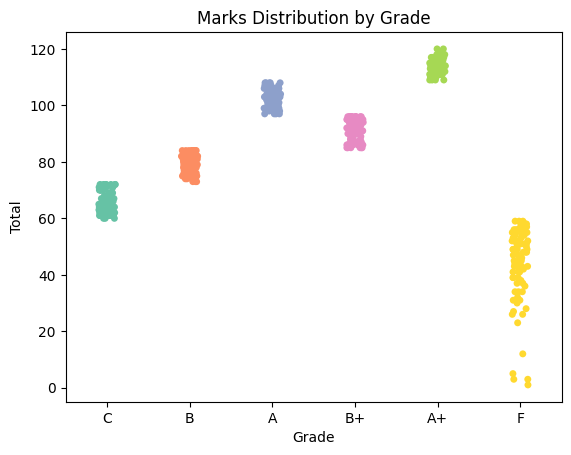

In [58]:
sns.stripplot(x='Grade', y='Total', data=data, jitter=True, palette='Set2')
plt.title('Marks Distribution by Grade')
plt.show()

This code generates a strip plot to show the distribution of individual Total marks within each Grade category. The jitter effect prevents data points from overlapping, making it easy to see the density of marks for each grade.

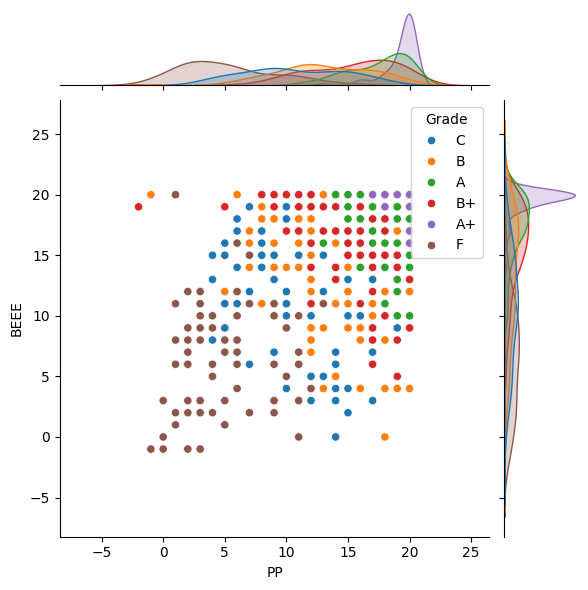

In [59]:
sns.jointplot(data=data, x="PP", y="BEEE", kind="scatter", hue="Grade")
plt.show()

This code creates a joint plot to visualize the relationship between marks in PP and BEEE. The scatter plot in the center shows individual data points, while the marginal histograms on the axes provide the distribution of each variable. The plot is further enhanced with color (hue) to show the grade of each student.

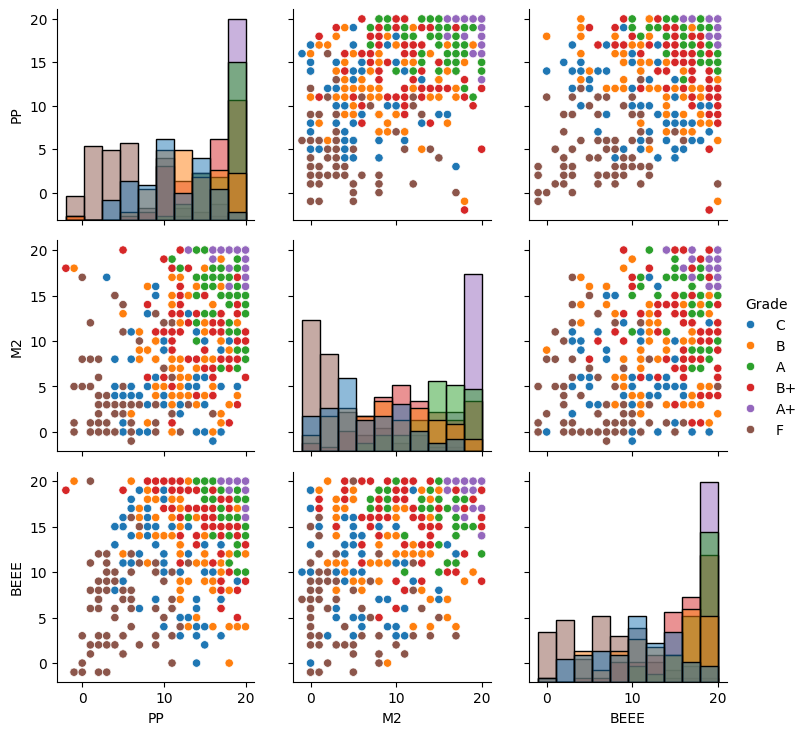

In [60]:
g = sns.PairGrid(data, vars=["PP", "M2", "BEEE"], hue="Grade")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

This code generates a pair grid to visualize the relationships between three subjects: PP, M2, and BEEE. The diagonal plots show the distribution of each variable using a histogram, while the off-diagonal plots show the scatter plots of each pair of subjects, with points colored by grade.

C:\Users\vinay\AppData\Local\Temp\ipykernel_24632\4244224918.py:1: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(data=data, x="Grade", y="Total", capsize=0.2, join=True)


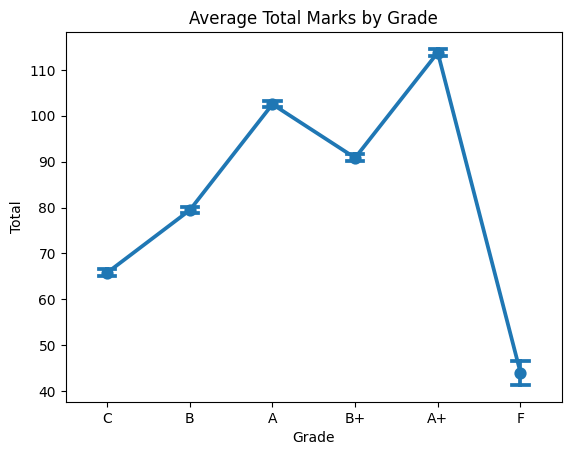

In [61]:
sns.pointplot(data=data, x="Grade", y="Total", capsize=0.2, join=True)
plt.title("Average Total Marks by Grade")
plt.show()


This code generates a bar plot to visualize the mean Total marks for each Grade. It uses the estimator and ci arguments to show both the average total marks and their standard deviation.

C:\Users\vinay\AppData\Local\Temp\ipykernel_24632\1734552491.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=data, x="Grade", y="Total", estimator=np.mean, ci="sd", palette="muted")
C:\Users\vinay\AppData\Local\Temp\ipykernel_24632\1734552491.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="Grade", y="Total", estimator=np.mean, ci="sd", palette="muted")


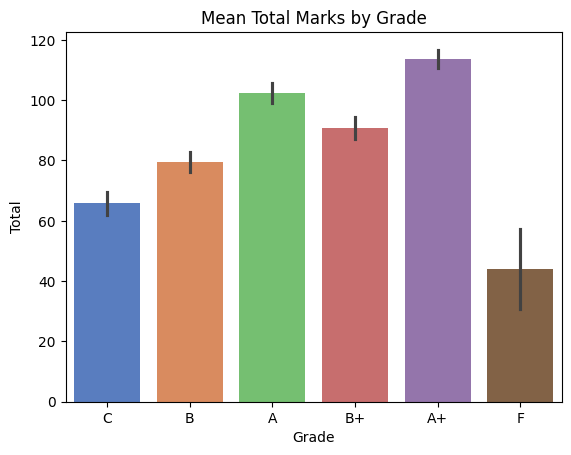

In [62]:
sns.barplot(data=data, x="Grade", y="Total", estimator=np.mean, ci="sd", palette="muted")
plt.title("Mean Total Marks by Grade")
plt.show()

This code creates a Kernel Density Estimate (KDE) plot of the Total marks, which provides a smooth curve showing the distribution of scores. It is complemented by a rug plot on the x-axis, where each line represents a single data point, giving a visual representation of the raw data.

C:\Users\vinay\AppData\Local\Temp\ipykernel_24632\1251177089.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x="Total", shade=True, color="red")


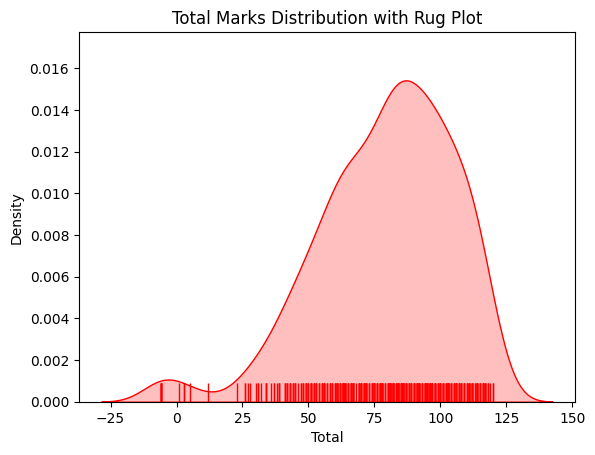

In [63]:
sns.kdeplot(data=data, x="Total", shade=True, color="red")
sns.rugplot(data=data, x="Total", height=0.05, color="red")
plt.title("Total Marks Distribution with Rug Plot")
plt.show()

This code first filters the data to select students with at least one Backlog. It then creates a pie chart that displays the percentage of students with backlogs in each SECTION.

In [64]:
a=data['DV']
a

0      12
1      19
2      18
3      15
4      18
       ..
469    11
470    18
471    20
472    20
473    20
Name: DV, Length: 474, dtype: Int64

In [65]:
data.set_index("S.NO", inplace=True)
data

,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade
S.NO,,,,,,,,,,
1,ALPHA,12,0,17,9,19,15,72,60.0,C
2,ALPHA,19,12,16,16,18,3,84,70.0,B
3,ALPHA,18,14,18,18,18,16,102,85.0,A
4,ALPHA,15,9,19,17,19,15,94,78.33,B+
5,ALPHA,18,17,19,19,20,18,111,92.5,A+
...,...,...,...,...,...,...,...,...,...,...
470,SIGMA,11,4,2,2,8,10,37,30.83,F
471,SIGMA,18,2,12,3,17,15,67,55.83,C
472,SIGMA,20,6,16,11,20,14,87,72.5,B+


In [66]:
data.reset_index(inplace=True)
data["S.NO"] = range(len(data))
data.set_index("S.NO", inplace=True)
print(data.head())

     SECTION  DV  M2  PP  BEEE  FL  FIMS  Total  Percentage Grade
S.NO                                                             
0      ALPHA  12   0  17     9  19    15     72        60.0     C
1      ALPHA  19  12  16    16  18     3     84        70.0     B
2      ALPHA  18  14  18    18  18    16    102        85.0     A
3      ALPHA  15   9  19    17  19    15     94       78.33    B+
4      ALPHA  18  17  19    19  20    18    111        92.5    A+


This code resets the DataFrame's index and then assigns a new "S.NO" column with a sequential range, making it the new index. This step is useful for creating a simple serial number for each record.



In [67]:
data['Backlog']=0
for i in range(len(data)):
    count=0
    if data['DV'][i]<10:
        count+=1
    if data['M2'][i]<10:
        count+=1
    if data['PP'][i]<10:
        count+=1
    if data['BEEE'][i]<10:
        count+=1
    if data['FL'][i]<10:
        count+=1
    if data['FIMS'][i]<10:
        count+=1
    data['Backlog'][i]=count
data

C:\Users\vinay\AppData\Local\Temp\ipykernel_24632\3855183114.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Backlog'][i]=count
C:\Users\vinay\AppData\Local\Temp\ipykernel_24632\3855183114.py:16: SettingWithCopyWarning: 
A value i

,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade,Backlog
S.NO,,,,,,,,,,,
0,ALPHA,12,0,17,9,19,15,72,60.0,C,2
1,ALPHA,19,12,16,16,18,3,84,70.0,B,1
2,ALPHA,18,14,18,18,18,16,102,85.0,A,0
3,ALPHA,15,9,19,17,19,15,94,78.33,B+,1
4,ALPHA,18,17,19,19,20,18,111,92.5,A+,0
...,...,...,...,...,...,...,...,...,...,...,...
469,SIGMA,11,4,2,2,8,10,37,30.83,F,4
470,SIGMA,18,2,12,3,17,15,67,55.83,C,2
471,SIGMA,20,6,16,11,20,14,87,72.5,B+,1


This code initializes a new column named Backlog with a value of 0. It then iterates through each row to check if the marks in any of the six specified subjects are less than 10, and it increments the Backlog count accordingly.

In [68]:
a=data[(data.Backlog==6)]
a

,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade,Backlog
S.NO,,,,,,,,,,,
82,BETA,2,0,2,-1,-1,-1,1,0.83,F,6
209,EPSILON,-1,-1,-1,-1,-1,-1,-6,-5.0,NaN,6
300,OMEGA,-1,-1,-1,-1,-1,-1,-6,-5.0,NaN,6
365,ZETA,-1,-1,-1,-1,-1,-1,-6,-5.0,NaN,6
377,OMEGA,-1,-1,-1,-1,-1,-1,-6,-5.0,NaN,6
396,OMEGA,-1,-1,-1,-1,-1,-1,-6,-5.0,NaN,6
412,OMEGA,9,0,-1,-1,-1,-1,5,4.17,F,6
420,SIGMA,6,1,-1,-1,-1,-1,3,2.5,F,6
422,SIGMA,-1,-1,-1,-1,-1,-1,-6,-5.0,NaN,6


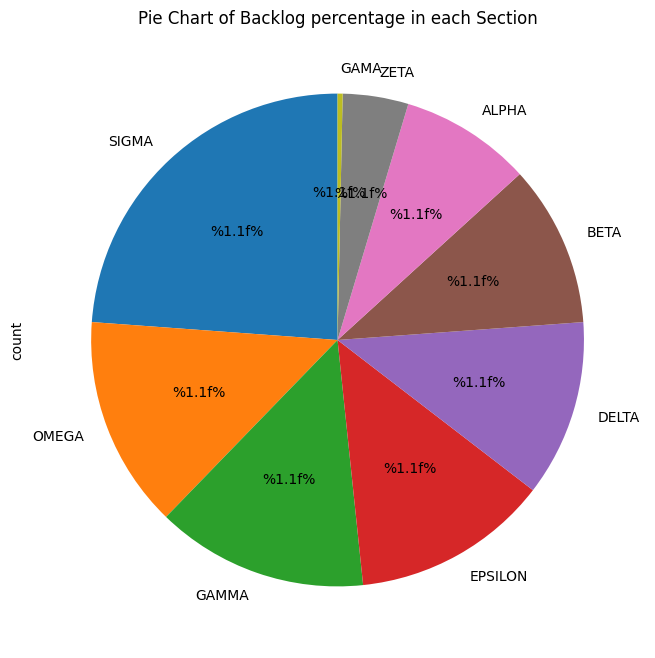

In [69]:
b=data.loc[(data['Backlog']>=1)]
a=b['SECTION'].value_counts()
a.plot(kind='pie', figsize=(8, 8), autopct='%%1.1f%%', startangle=90)
plt.title("Pie Chart of Backlog percentage in each Section")
plt.show()

This code filters the data to include only students with one or more backlogs. It then creates a pie chart that displays the percentage of students with backlogs in each section.

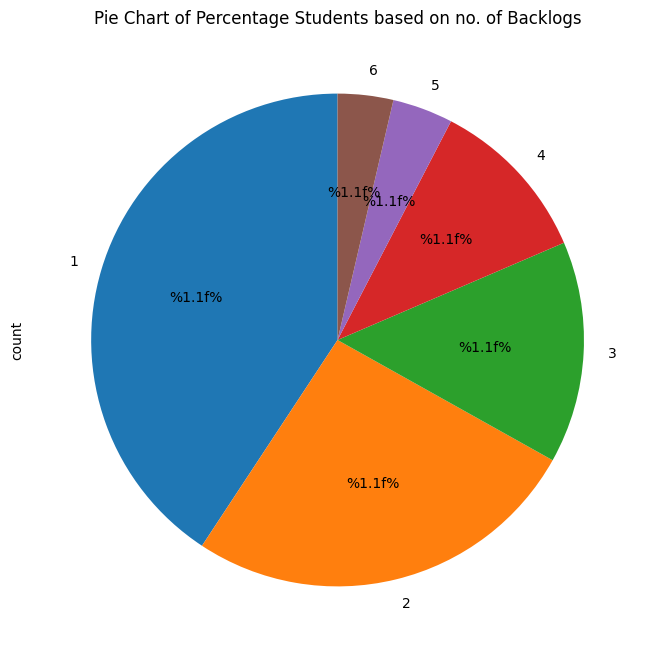

In [70]:
b=data.loc[(data['Backlog']>=1)]
a=b["Backlog"].value_counts()
a.plot(kind='pie', figsize=(8, 8), autopct='%%1.1f%%', startangle=90)
plt.title("Pie Chart of Percentage Students based on no. of Backlogs")
plt.show()

This code again filters the data for students who have backlogs. It then generates a pie chart showing the percentage of students based on the number of backlogs they have.

In [71]:
a=data[(data.DV<10)]
a.SECTION.value_counts()

SECTION
BETA       15
SIGMA      13
DELTA      11
ALPHA       9
OMEGA       8
EPSILON     7
ZETA        5
Name: count, dtype: int64

In [72]:
a=data[(data.PP<10)]
a.SECTION.value_counts()

SECTION
SIGMA      31
OMEGA      28
GAMMA      27
EPSILON    14
ZETA       10
DELTA      10
BETA        8
ALPHA       7
GAMA        1
Name: count, dtype: int64

In [73]:
data.loc[(data['PP']>=18) & (data['PP']<=20), ["Programming Skills"]]="Very Good"
data.loc[(data['PP']>=15) & (data['PP']<=17), ["Programming Skills"]]="Good"
data.loc[(data['PP']>=12) & (data['PP']<=14), ["Programming Skills"]]="Average"
data.loc[(data['PP']<11), ["Programming Skills"]]="Poor"
data

,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade,Backlog,Programming Skills
S.NO,,,,,,,,,,,,
0,ALPHA,12,0,17,9,19,15,72,60.0,C,2,Good
1,ALPHA,19,12,16,16,18,3,84,70.0,B,1,Good
2,ALPHA,18,14,18,18,18,16,102,85.0,A,0,Very Good
3,ALPHA,15,9,19,17,19,15,94,78.33,B+,1,Very Good
4,ALPHA,18,17,19,19,20,18,111,92.5,A+,0,Very Good
...,...,...,...,...,...,...,...,...,...,...,...,...
469,SIGMA,11,4,2,2,8,10,37,30.83,F,4,Poor
470,SIGMA,18,2,12,3,17,15,67,55.83,C,2,Average
471,SIGMA,20,6,16,11,20,14,87,72.5,B+,1,Good


This code categorizes students' programming skills based on their PP marks using a series of conditional statements. It assigns "Very Good," "Good," "Average," or "Poor" to a new Programming Skills column based on the specified mark ranges.

In [74]:
data["Programming Skills"].value_counts()

Programming Skills
Poor         154
Very Good    138
Good          83
Average       71
Name: count, dtype: int64

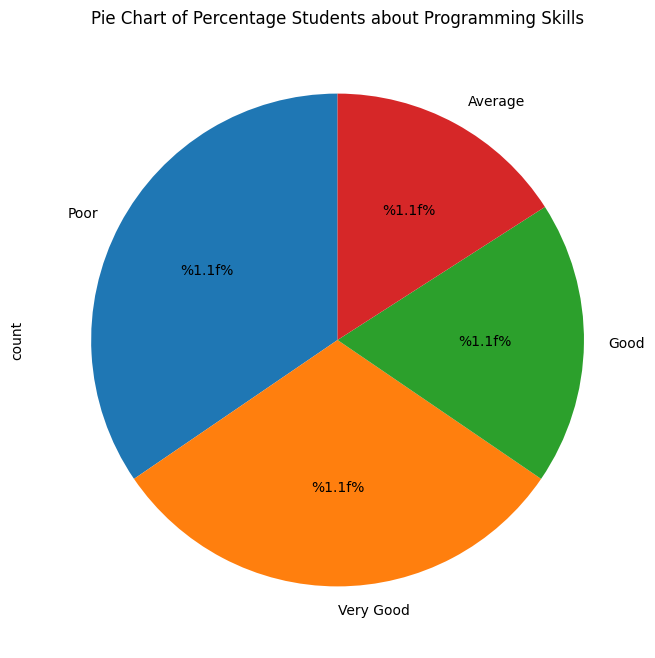

In [75]:
b=data.loc[data["PP"]>=-2]
a=b["Programming Skills"].value_counts()
a.plot(kind='pie', figsize=(8, 8), autopct='%%1.1f%%', startangle=90)
plt.title("Pie Chart of Percentage Students about Programming Skills")
plt.show()

This code filters the data based on the PP column and then generates a pie chart showing the percentage of students in each Programming Skills category. It provides a visual breakdown of the students' self-assessed programming abilities.

In [76]:
def daSkills(marks):
    if 18 <= marks <= 20:
        return 'very good'
    elif 15 <= marks <= 17:
        return 'good'
    elif 12 <= marks <= 14:
        return 'Avg'
    else:
        return 'poor'
data['DA_Skills'] = data['DV'].apply(daSkills)
data

,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade,Backlog,Programming Skills,DA_Skills
S.NO,,,,,,,,,,,,,
0,ALPHA,12,0,17,9,19,15,72,60.0,C,2,Good,Avg
1,ALPHA,19,12,16,16,18,3,84,70.0,B,1,Good,very good
2,ALPHA,18,14,18,18,18,16,102,85.0,A,0,Very Good,very good
3,ALPHA,15,9,19,17,19,15,94,78.33,B+,1,Very Good,good
4,ALPHA,18,17,19,19,20,18,111,92.5,A+,0,Very Good,very good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,SIGMA,11,4,2,2,8,10,37,30.83,F,4,Poor,poor
470,SIGMA,18,2,12,3,17,15,67,55.83,C,2,Average,very good
471,SIGMA,20,6,16,11,20,14,87,72.5,B+,1,Good,very good


This code resets the DataFrame's index and then assigns a new "S.NO" column with a sequential range, making it the new index. This step is useful for creating a simple serial number for each record.



In [77]:
data['Status']=0
for i in range(len(data)):
    if data['DV'][i]==20 or data['M2'][i]==20 or data['PP'][i]==20 or data['BEEE'][i]==20 or data['FL'][i]==20 or data['FIMS'][i]==20:
        data['Status'][i]='True'
    else:
        data['Status'][i]='False'
data

C:\Users\vinay\AppData\Local\Temp\ipykernel_24632\3638299714.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Status'][i]='False'
C:\Users\vinay\AppData\Local\Temp\ipykernel_24632\3638299714.py:6: SettingWithCopyWarning: 
A value is

,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade,Backlog,Programming Skills,DA_Skills,Status
S.NO,,,,,,,,,,,,,,
0,ALPHA,12,0,17,9,19,15,72,60.0,C,2,Good,Avg,False
1,ALPHA,19,12,16,16,18,3,84,70.0,B,1,Good,very good,False
2,ALPHA,18,14,18,18,18,16,102,85.0,A,0,Very Good,very good,False
3,ALPHA,15,9,19,17,19,15,94,78.33,B+,1,Very Good,good,False
4,ALPHA,18,17,19,19,20,18,111,92.5,A+,0,Very Good,very good,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,SIGMA,11,4,2,2,8,10,37,30.83,F,4,Poor,poor,False
470,SIGMA,18,2,12,3,17,15,67,55.83,C,2,Average,very good,False
471,SIGMA,20,6,16,11,20,14,87,72.5,B+,1,Good,very good,True


In [78]:
data["Status"].value_counts()

Status
False    293
True     181
Name: count, dtype: int64

In [79]:
a=data['DV']
a

S.NO
0      12
1      19
2      18
3      15
4      18
       ..
469    11
470    18
471    20
472    20
473    20
Name: DV, Length: 474, dtype: Int64

In [80]:
print(data.columns)

Index(['SECTION', 'DV', 'M2', 'PP', 'BEEE', 'FL', 'FIMS', 'Total',
       'Percentage', 'Grade', 'Backlog', 'Programming Skills', 'DA_Skills',
       'Status'],
      dtype='object')


In [81]:
data.reset_index(inplace=True)
data["S.NO"] = range(len(data))
data.set_index("S.NO", inplace=True)
print(data.head())

     SECTION  DV  M2  PP  BEEE  FL  FIMS  Total  Percentage Grade  Backlog  \
S.NO                                                                         
0      ALPHA  12   0  17     9  19    15     72        60.0     C        2   
1      ALPHA  19  12  16    16  18     3     84        70.0     B        1   
2      ALPHA  18  14  18    18  18    16    102        85.0     A        0   
3      ALPHA  15   9  19    17  19    15     94       78.33    B+        1   
4      ALPHA  18  17  19    19  20    18    111        92.5    A+        0   

     Programming Skills  DA_Skills Status  
S.NO                                       
0                  Good        Avg  False  
1                  Good  very good  False  
2             Very Good  very good  False  
3             Very Good       good  False  
4             Very Good  very good   True  


In [82]:
data['Backlog']=0
for i in range(len(data)):
    count=0
    if data['DV'][i]<10:
        count+=1
    if data['M2'][i]<10:
        count+=1
    if data['PP'][i]<10:
        count+=1
    if data['BEEE'][i]<10:
        count+=1
    if data['FL'][i]<10:
        count+=1
    if data['FIMS'][i]<10:
        count+=1
    data['Backlog'][i]=count
data

C:\Users\vinay\AppData\Local\Temp\ipykernel_24632\3855183114.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Backlog'][i]=count
C:\Users\vinay\AppData\Local\Temp\ipykernel_24632\3855183114.py:16: SettingWithCopyWarning: 
A value i

,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade,Backlog,Programming Skills,DA_Skills,Status
S.NO,,,,,,,,,,,,,,
0,ALPHA,12,0,17,9,19,15,72,60.0,C,2,Good,Avg,False
1,ALPHA,19,12,16,16,18,3,84,70.0,B,1,Good,very good,False
2,ALPHA,18,14,18,18,18,16,102,85.0,A,0,Very Good,very good,False
3,ALPHA,15,9,19,17,19,15,94,78.33,B+,1,Very Good,good,False
4,ALPHA,18,17,19,19,20,18,111,92.5,A+,0,Very Good,very good,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,SIGMA,11,4,2,2,8,10,37,30.83,F,4,Poor,poor,False
470,SIGMA,18,2,12,3,17,15,67,55.83,C,2,Average,very good,False
471,SIGMA,20,6,16,11,20,14,87,72.5,B+,1,Good,very good,True


In [83]:
# Code from In[107]
a=data[(data.Backlog==6)]
a

,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade,Backlog,Programming Skills,DA_Skills,Status
S.NO,,,,,,,,,,,,,,
82,BETA,2,0,2,-1,-1,-1,1,0.83,F,6,Poor,poor,False
209,EPSILON,-1,-1,-1,-1,-1,-1,-6,-5.0,NaN,6,Poor,poor,False
300,OMEGA,-1,-1,-1,-1,-1,-1,-6,-5.0,NaN,6,Poor,poor,False
365,ZETA,-1,-1,-1,-1,-1,-1,-6,-5.0,NaN,6,Poor,poor,False
377,OMEGA,-1,-1,-1,-1,-1,-1,-6,-5.0,NaN,6,Poor,poor,False
396,OMEGA,-1,-1,-1,-1,-1,-1,-6,-5.0,NaN,6,Poor,poor,False
412,OMEGA,9,0,-1,-1,-1,-1,5,4.17,F,6,Poor,poor,False
420,SIGMA,6,1,-1,-1,-1,-1,3,2.5,F,6,Poor,poor,False
422,SIGMA,-1,-1,-1,-1,-1,-1,-6,-5.0,NaN,6,Poor,poor,False


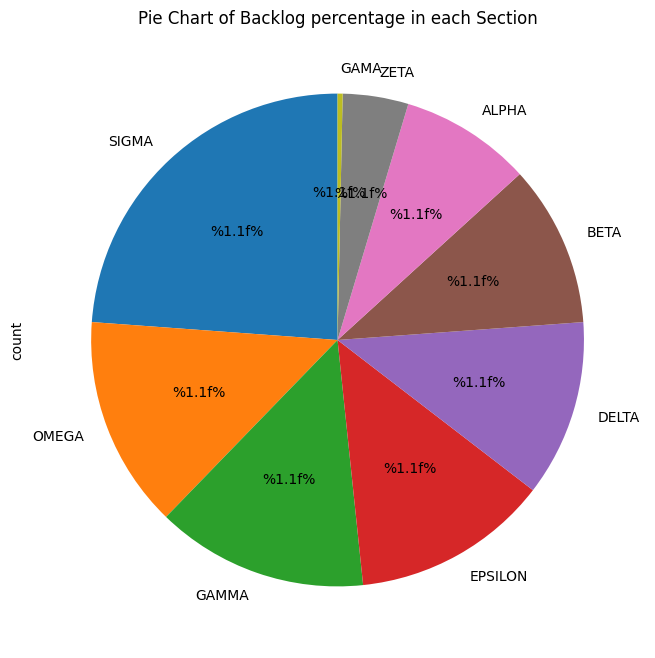

In [84]:
b=data.loc[(data['Backlog']>=1)]
a=b['SECTION'].value_counts()
a.plot(kind='pie', figsize=(8, 8), autopct='%%1.1f%%', startangle=90)
plt.title("Pie Chart of Backlog percentage in each Section")
plt.show()

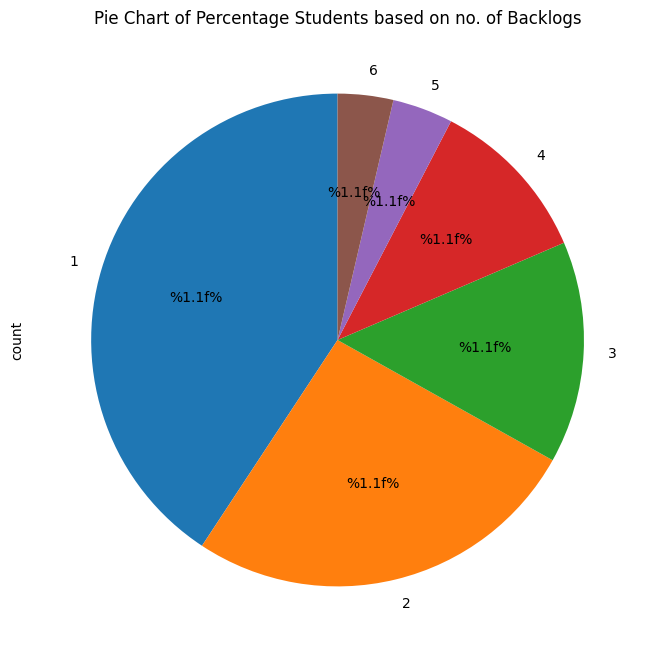

In [85]:
b=data.loc[(data['Backlog']>=1)]
a=b["Backlog"].value_counts()
a.plot(kind='pie', figsize=(8, 8), autopct='%%1.1f%%', startangle=90)
plt.title("Pie Chart of Percentage Students based on no. of Backlogs")
plt.show()

In [86]:
a=data[(data.DV<10)]
a.SECTION.value_counts()


SECTION
BETA       15
SIGMA      13
DELTA      11
ALPHA       9
OMEGA       8
EPSILON     7
ZETA        5
Name: count, dtype: int64

In [87]:
a=data[(data.PP<10)]
a.SECTION.value_counts()

SECTION
SIGMA      31
OMEGA      28
GAMMA      27
EPSILON    14
ZETA       10
DELTA      10
BETA        8
ALPHA       7
GAMA        1
Name: count, dtype: int64

In [88]:
data.loc[(data['PP']>=18) & (data['PP']<=20), ["Programming Skills"]]="Very Good"
data.loc[(data['PP']>=15) & (data['PP']<=17), ["Programming Skills"]]="Good"
data.loc[(data['PP']>=12) & (data['PP']<=14), ["Programming Skills"]]="Average"
data.loc[(data['PP']<11), ["Programming Skills"]]="Poor"
data


,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade,Backlog,Programming Skills,DA_Skills,Status
S.NO,,,,,,,,,,,,,,
0,ALPHA,12,0,17,9,19,15,72,60.0,C,2,Good,Avg,False
1,ALPHA,19,12,16,16,18,3,84,70.0,B,1,Good,very good,False
2,ALPHA,18,14,18,18,18,16,102,85.0,A,0,Very Good,very good,False
3,ALPHA,15,9,19,17,19,15,94,78.33,B+,1,Very Good,good,False
4,ALPHA,18,17,19,19,20,18,111,92.5,A+,0,Very Good,very good,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,SIGMA,11,4,2,2,8,10,37,30.83,F,4,Poor,poor,False
470,SIGMA,18,2,12,3,17,15,67,55.83,C,2,Average,very good,False
471,SIGMA,20,6,16,11,20,14,87,72.5,B+,1,Good,very good,True


This code first categorizes students' programming skills into four levels (Very Good, Good, Average, Poor) based on their PP marks. It then tallies and displays the number of students who fall into each of these skill categories.

In [89]:
data["Programming Skills"].value_counts()

Programming Skills
Poor         154
Very Good    138
Good          83
Average       71
Name: count, dtype: int64

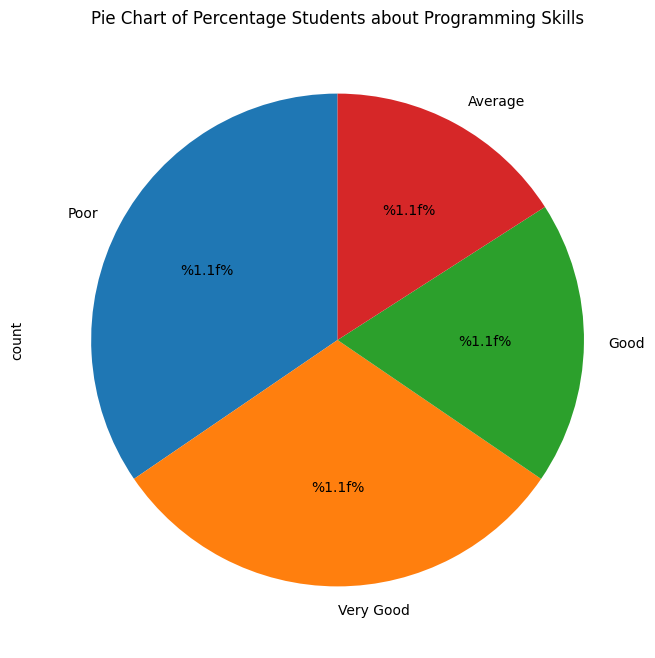

In [90]:
b=data.loc[data["PP"]>=-2]
a=b["Programming Skills"].value_counts()
a.plot(kind='pie', figsize=(8, 8), autopct='%%1.1f%%', startangle=90)
plt.title("Pie Chart of Percentage Students about Programming Skills")
plt.show()


This code filters the data and then generates a pie chart to visualize the distribution of students' programming skills. The chart clearly displays the percentage of students in each skill category.

In [91]:
data["DA_Skills"].value_counts()

DA_Skills
good         144
very good    134
poor         120
Avg           76
Name: count, dtype: int64

This code counts the number of students in each DA_Skills category. The output provides a summary of the distribution of skills across the dataset.

In [92]:
data["Status"].value_counts()

Status
False    293
True     181
Name: count, dtype: int64

This code counts the occurrences of each value in the Status column. It provides a quick summary of the number of students in each Status category, such as those who passed or failed.

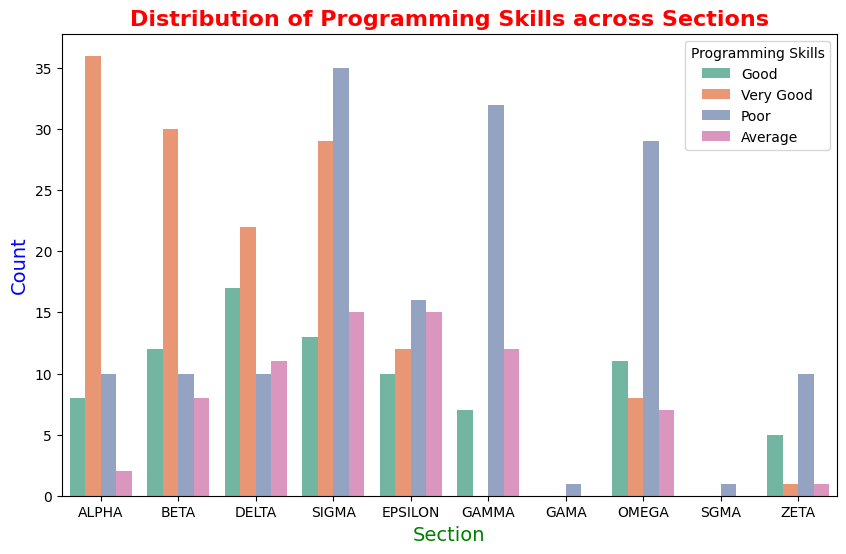

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(x='SECTION', hue='Programming Skills', data=data, palette="Set2", dodge=True)
plt.title("Distribution of Programming Skills across Sections",fontsize=16,weight='bold',color='red')
plt.xlabel("Section",fontsize=14,color='green')
plt.ylabel("Count",fontsize=14,color='blue')
plt.show()


This code generates a grouped count plot that visualizes the distribution of Programming skills within each SECTION. The plot shows how many students in each section fall into each skill category, providing a clear comparison across sections within each SECTION. The plot shows how many students in each section fall into each skill category, providing a clear comparison across sections

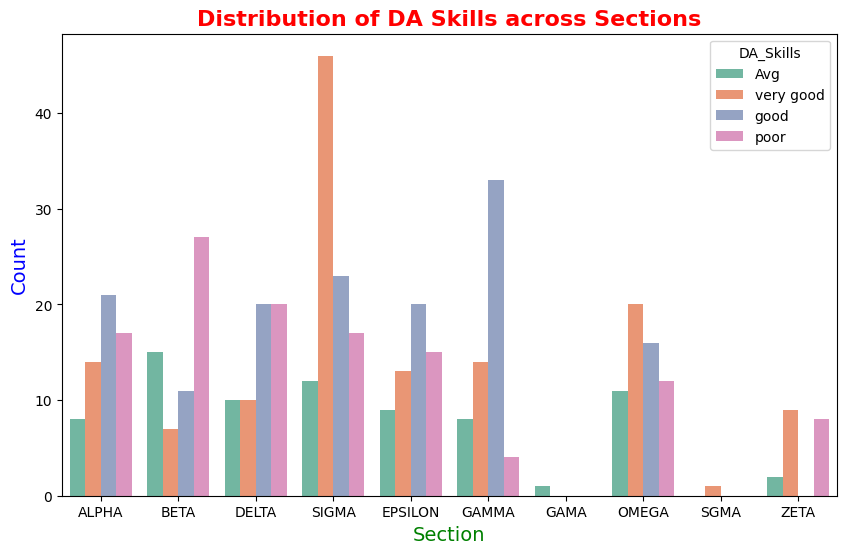

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(x='SECTION', hue='DA_Skills', data=data, palette="Set2", dodge=True)
plt.title("Distribution of DA Skills across Sections", fontsize=16, weight='bold', color='red')
plt.xlabel("Section", fontsize=14, color='green')
plt.ylabel("Count", fontsize=14, color='blue')
plt.show()


This code generates a grouped count plot that visualizes the distribution of DA_Skills within each SECTION. The plot shows how many students in each section fall into each skill category, providing a clear comparison across sections

Conclusion:
        Based on the visulization of midmarks csv , here is the observations:

The `ALPHA` section needs more DA skills, as it has the highest number of students in the "poor" category.

The sections with the most remedial classes would be `ALPHA`, `BETA`, and `GAMMA`, due to their high number of "poor" and "average" performers. These sections have the largest populations of students who could benefit from targeted improvement programs.

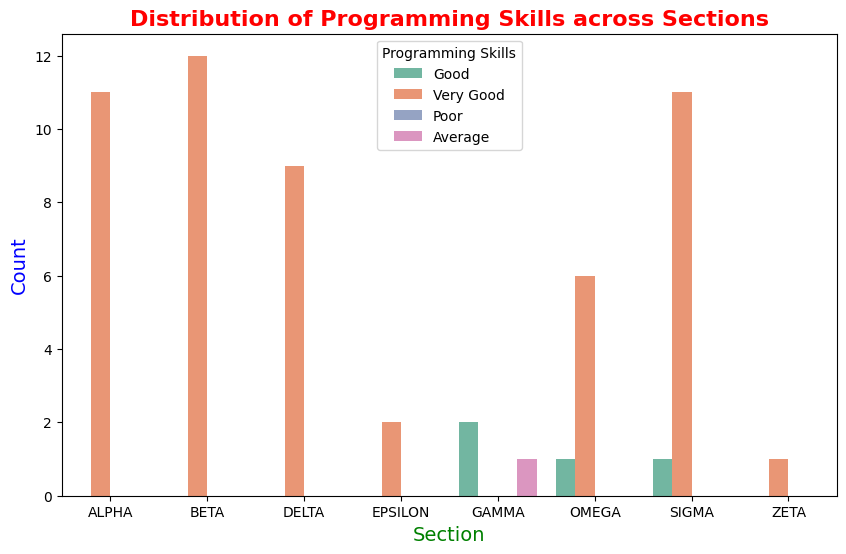

In [95]:
a = data[data["Grade"]=="A+"]
b = a["SECTION"]

plt.figure(figsize=(10,6))
sns.countplot(x=b, hue="Programming Skills", data=data, palette="Set2", dodge=True)
plt.title("Distribution of Programming Skills across Sections",fontsize=16,weight='bold',color='red')
plt.xlabel("Section",fontsize=14,color='green')
plt.ylabel("Count",fontsize=14,color='blue')
plt.show()

Programming Skills: The majority of 'A+' students across all sections possess Very Good programming skills. Sections ALPHA, BETA, DELTA, OMEGA, and SIGMA have a high concentration of students with this skill level, while other skill levels (Good, Poor, Average) are either non-existent or minimal.

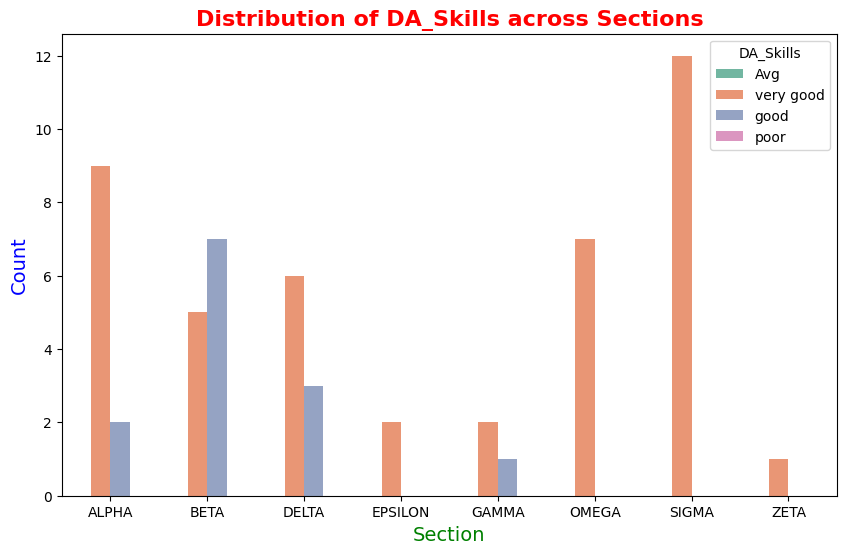

In [96]:
a = data[data["Grade"]=="A+"]
b = a["SECTION"]

plt.figure(figsize=(10,6))
sns.countplot(x=b, hue="DA_Skills", data=data, palette="Set2", dodge=True)
plt.title("Distribution of DA_Skills across Sections",fontsize=16,weight='bold',color='red')
plt.xlabel("Section",fontsize=14,color='green')
plt.ylabel("Count",fontsize=14,color='blue')
plt.show()

DA Skills: In contrast to programming, the distribution of Data Analytics (DA) skills is more varied. While most sections like ALPHA, DELTA, EPSILON, OMEGA, and SIGMA have a high number of 'A+' students with Very Good DA skills, sections BETA and GAMMA show a significant count of students with Good or Average skills, indicating a more mixed skill set in these sections.